In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../../../data/titanic_train.csv')

df.head()

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print(df.shape)
print('-'*60)
print(df.columns)
print('-'*60)

print(df.info())

df['Pclass'] = df['Pclass'].astype('int64')
print('-'*60)

df.sort_values(by='Age', ascending=False).head()

df.sort_values(by=['Age', 'Survived'], ascending=[True, False]).head()

#df.apply(np.max)

d={0: False, 1: True}
df['Survived'] = df['Survived'].map(d)
df.head()

(891, 12)
------------------------------------------------------------
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
(183, 12)


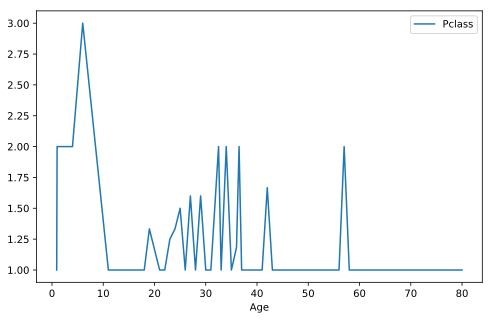

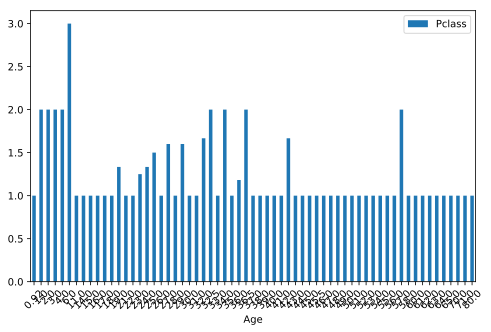

In [37]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
df.info()
df = df.dropna()
print(df.shape)

surv_df = df[[x for x in df.columns if 'Age' in x] + ['Pclass']]
surv_df.groupby('Age').mean().plot()

surv_df.groupby('Age').mean().plot(kind = 'bar', rot=45)

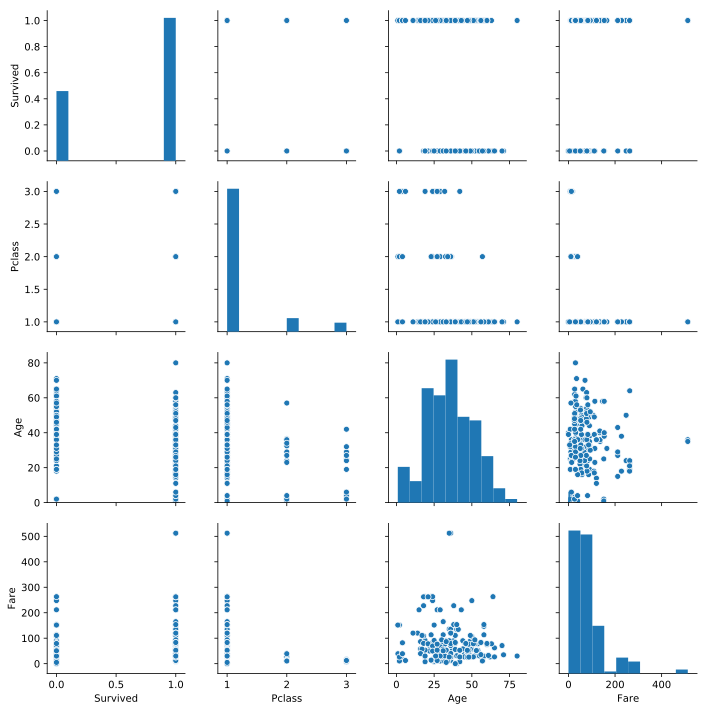

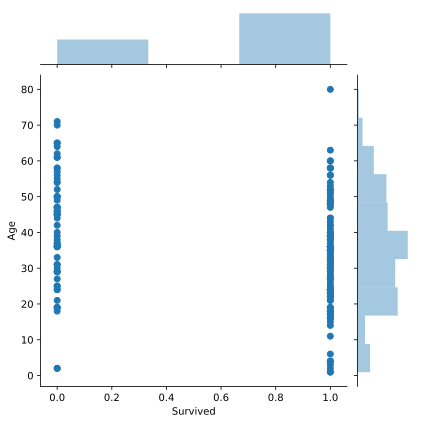

In [40]:
cols= ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')
sns.distplot(df.Pclass)
sns.jointplot(x="Survived", y="Age", data=df)

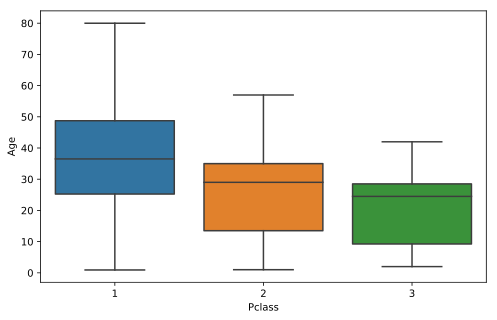

In [47]:
sns.boxplot(y='Age', x='Pclass', data = df)

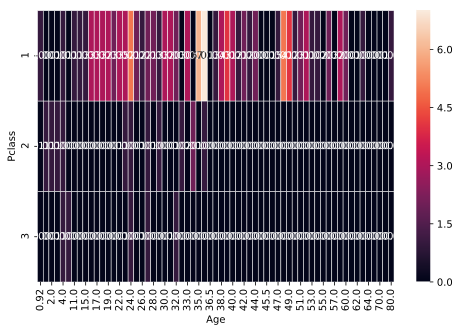

In [57]:
surv = df.pivot_table(index = 'Pclass', 
                                      columns = 'Age', 
                                      values = 'Survived', 
                                     aggfunc=sum).fillna(0).applymap(int)
sns.heatmap(surv, annot=True, fmt=".1f", linewidths=.5)

In [8]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected = True)

surv_df = df.groupby('Age')[['Fare']].sum().join(df.groupby('Survived')[['Name']].count())
surv_df.columns = ['Age', 'Fare']

trace0 = go.Scatter(x = surv_df.index, y = surv_df.Age, name = 'Age')

trace1 = go.Scatter(x = surv_df.index, y = surv_df.Fare, name = 'Fare')

data = [trace0, trace1]
layout = {'title' : 'age'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file://C:\\Users\\Pirate Master\\Python\\ii\\AI_1\\лабы_решения\\1161_1\\Лермонтов\\lab2\\years_stats.html'

In [7]:
surv_df = df.groupby('Pclass')[['Sex']].sum().join(df.groupby('Pclass')[['Name']].count())
surv_df.columns = ['Sex', 'Pclass']
surv_df.sort_values('Sex', ascending=False, inplace=True)

trace0 = go.Bar(x = surv_df.index, y = surv_df.Pclass, name='Survived')

data = [trace0]
layout = {'xaxis' : {'title' : 'plass'}} 

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [30]:
data = []
df['Pclass'] = df.Pclass.astype('object')
for a in df.Pclass.unique():
    data.append(go.Box(y=df[df.Pclass==a].Fare, name=a))
iplot(data, show_link=False)